In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
num_straps = 6
freq = 0.5e9
w0 = 2*np.pi*freq
C = 1.12e-12
L = 1/(w0**2*C)
print('C: ', C, ' F', 'L: ', L, 'H')
M = 4.7/w0
print('M: ', M, ' H')

RL = 2
Rc = 0.000
Rt = RL+ Rc

def get_Zmat(num_straps, w, S, M, R0):
    Zmat = np.zeros((num_straps, num_straps), dtype=complex)
    for i in range(num_straps):
        for j in range(num_straps):
            if i == j:
                Zmat[i,j] = -S
                if i !=0:
                    Zmat[i, j-1] = 1j*w*M
                if i != num_straps-1:
                    Zmat[i,j+1] = 1j*w*M
    Zmat[-1,-1] = -S - R0
    return Zmat


def solve_TWA(f, w0, num_straps, Vin, L, C, M, Rt, R0):
    w = 2*np.pi*f
    S = Rt + 1j*w*L - 1j/(w*C) # make function 
    #print('S: ', S)
    V_vec= np.zeros((num_straps, 1), dtype=complex)
    V_vec[0] = Vin

    # calaculate Zin0 for the reflection coeffecient 
    S0 = Rt + 1j*w0*L - 1j/(w0*C) # + Rt # S0 at resonance
    Zmat0 = get_Zmat(num_straps, w0, S0, M, R0)
    I_vec0 = np.matmul(np.linalg.inv(Zmat0), V_vec)
    Zin0 = (Vin/I_vec0[0]) # TODO made this abs
    print('R0: ', R0, 'Zin0: ', Zin0)

    Zmat = get_Zmat(num_straps, w, S, M, R0)
    #print('---')
    #print(Zmat)
    #print('---')
    #Zit = np.sqrt(np.abs(Zmat[0,0])**2 - np.abs(Zmat[-1,-1])**2)
    #print(Zit)
    #print(Zmat)
    I_vec = np.matmul(np.linalg.inv(Zmat), V_vec)
    Pt = 0.5*np.abs(I_vec[-1])**2*R0
    Pf = np.abs(0.5*np.real(np.conjugate(I_vec[0])*Vin)) # absolute value to get rid of sign? #TODO add back in abs
    #print(np.conjugate(I_vec[0])*Vin)
    Zin = (Vin/I_vec[0]) # TODO made this abs
    print("Zin: ", Zin)
    #print(I_vec)
    #print(Zin)
    
    T = Pt/Pf
    rho = (Zin - Zin0)/(Zin + Zin0)
    R = (np.abs(rho)**2)
    A = 1 - (R + T)

    return T, R, A, Pt, Pf, I_vec, Zin


C:  1.12e-12  F L:  9.046534253780158e-08 H
M:  1.4960564650638161e-09  H


In [7]:
T, R, A, Pt, Pf, I_vec, Zin = solve_TWA(w0/(2*np.pi), w0, num_straps, 1, L, C, M, Rt, R0=w0*M)
Zin

R0:  4.7 Zin0:  [-5.70716399-0.j]
Zin:  [-5.70716399-0.j]


array([-5.70716399-0.j])

In [8]:
# scan the Zin for different Rt:
num_straps = 10
Rt_array = np.linspace(0, 6, 100)
Zin_array = np.zeros_like(Rt_array, dtype=complex)
for i in range(Rt_array.shape[0]):
    Rt = Rt_array[i]
    T, R, A, Pt, Pf, I_vec, Zin = solve_TWA(w0/(2*np.pi), w0, num_straps, 1, L, C, M, Rt, R0=w0*M)
    Zin_array[i] = Zin[0]

def Zin3_analytical(Rt, R0, M, w):
    return Rt + R0*(w**2*M**2) / (w**2*M**2 + Rt*R0)

def Zi_any2(Rt, M, w):
    return w*M*(1 - (1/8)*(Rt/(w*M))**2)

Zinany = Zin3_analytical(Rt_array, R0=w0*M, M=M, w=w0)
Zinany2 = Zi_any2(Rt_array, M, w=w0)

R0:  4.7 Zin0:  [-4.7-0.j]
Zin:  [-4.7-0.j]
R0:  4.7 Zin0:  [-4.70366743-0.j]
Zin:  [-4.70366743-0.j]
R0:  4.7 Zin0:  [-4.71379621-0.j]
Zin:  [-4.71379621-0.j]
R0:  4.7 Zin0:  [-4.72924876-0.j]
Zin:  [-4.72924876-0.j]
R0:  4.7 Zin0:  [-4.74908331-0.j]
Zin:  [-4.74908331-0.j]
R0:  4.7 Zin0:  [-4.77251838-0.j]
Zin:  [-4.77251838-0.j]
R0:  4.7 Zin0:  [-4.79890457-0.j]
Zin:  [-4.79890457-0.j]
R0:  4.7 Zin0:  [-4.82770198-0.j]
Zin:  [-4.82770198-0.j]
R0:  4.7 Zin0:  [-4.85846182-0.j]
Zin:  [-4.85846182-0.j]
R0:  4.7 Zin0:  [-4.89081137-0.j]
Zin:  [-4.89081137-0.j]
R0:  4.7 Zin0:  [-4.92444163-0.j]
Zin:  [-4.92444163-0.j]
R0:  4.7 Zin0:  [-4.95909701-0.j]
Zin:  [-4.95909701-0.j]
R0:  4.7 Zin0:  [-4.99456683-0.j]
Zin:  [-4.99456683-0.j]
R0:  4.7 Zin0:  [-5.03067807-0.j]
Zin:  [-5.03067807-0.j]
R0:  4.7 Zin0:  [-5.06728939-0.j]
Zin:  [-5.06728939-0.j]
R0:  4.7 Zin0:  [-5.10428598-0.j]
Zin:  [-5.10428598-0.j]
R0:  4.7 Zin0:  [-5.14157533-0.j]
Zin:  [-5.14157533-0.j]
R0:  4.7 Zin0:  [-5.17908353

Text(0, 0.5, 'Z$_{in}$')

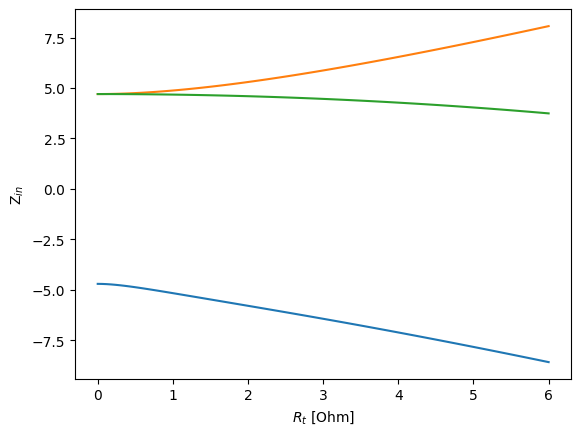

In [9]:
plt.plot(Rt_array, np.real(Zin_array))
plt.plot(Rt_array, Zinany)
plt.plot(Rt_array, Zinany2)
plt.xlabel(r'$R_t$ [Ohm]')
plt.ylabel(r'Z$_{in}$')
#plt.plot(Rt_array, np.imag(Zin_array))

In [15]:
# scan the Zin for different Rt:
num_straps = 8
# Rt_scan = np.array([0.01, 0.07, 0.1, 1.00, 2.00])
Rt_scan = np.array([0.0,0.001, 0.01, 0.04,0.06, 0.07, 0.1, 1.00, 2.00])
f_array = np.linspace(0.48e9, 0.52e9, 1000)
R_array = np.zeros((Rt_scan.shape[0], f_array.shape[0]), dtype=complex)
T_array = np.zeros((Rt_scan.shape[0], f_array.shape[0]), dtype=complex)
A_array = np.zeros((Rt_scan.shape[0], f_array.shape[0]), dtype=complex)

for i in range(Rt_scan.shape[0]):
    for j in range(f_array.shape[0]):
        Rt = Rt_scan[i]
        f = f_array[j]
        T, R, A, Pt, Pf, I_vec, Zin = solve_TWA(f, w0, num_straps, 1, L, C, M, Rt, R0=w0*M)
        R_array[i, j] = R[0]
        T_array[i, j] = T[0]
        A_array[i, j] = A[0]



R0:  4.7 Zin0:  [-4.7-0.j]
Zin:  [-7.99104121e-10+22.29705399j]
R0:  4.7 Zin0:  [-4.7-0.j]
Zin:  [-8.24912757e-10+22.24741157j]
R0:  4.7 Zin0:  [-4.7-0.j]
Zin:  [-8.51613925e-10+22.19776321j]
R0:  4.7 Zin0:  [-4.7-0.j]
Zin:  [-8.79240576e-10+22.14810884j]
R0:  4.7 Zin0:  [-4.7-0.j]
Zin:  [-9.07826959e-10+22.09844839j]
R0:  4.7 Zin0:  [-4.7-0.j]
Zin:  [-9.3740867e-10+22.04878178j]
R0:  4.7 Zin0:  [-4.7-0.j]
Zin:  [-9.68022712e-10+21.99910894j]
R0:  4.7 Zin0:  [-4.7-0.j]
Zin:  [-9.99707552e-10+21.94942979j]
R0:  4.7 Zin0:  [-4.7-0.j]
Zin:  [-1.03250318e-09+21.89974426j]
R0:  4.7 Zin0:  [-4.7-0.j]
Zin:  [-1.06645119e-09+21.85005226j]
R0:  4.7 Zin0:  [-4.7-0.j]
Zin:  [-1.10159482e-09+21.80035372j]
R0:  4.7 Zin0:  [-4.7-0.j]
Zin:  [-1.13797904e-09+21.75064855j]
R0:  4.7 Zin0:  [-4.7-0.j]
Zin:  [-1.17565061e-09+21.70093668j]
R0:  4.7 Zin0:  [-4.7-0.j]
Zin:  [-1.2146582e-09+21.65121803j]
R0:  4.7 Zin0:  [-4.7-0.j]
Zin:  [-1.25505241e-09+21.60149251j]
R0:  4.7 Zin0:  [-4.7-0.j]
Zin:  [-1.29688

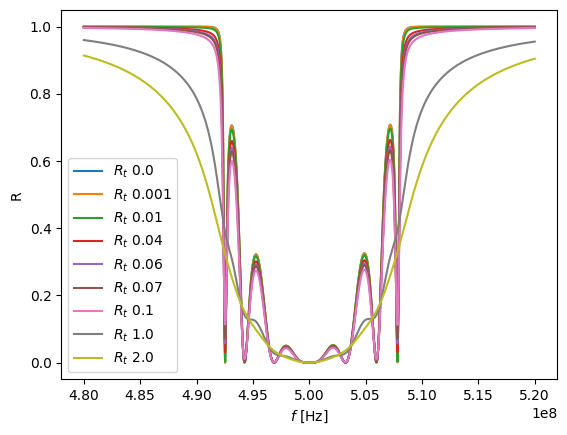

In [16]:
for i in range(Rt_scan.shape[0]):
    label = r'$R_t$ ' + str(Rt_scan[i])
    plt.plot(f_array, np.real(R_array[i, :]), label=label)

plt.xlabel(r'$f$ [Hz]')
plt.ylabel(r'R')
plt.legend()

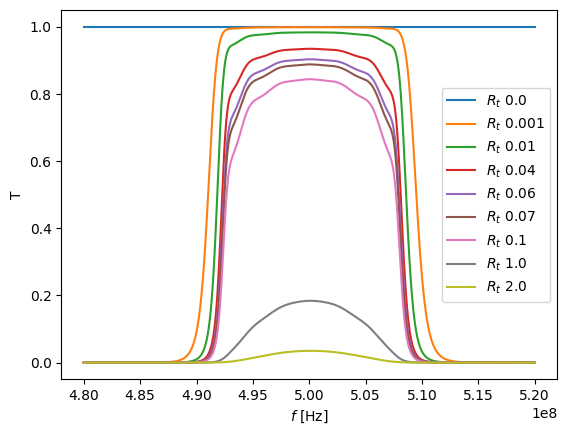

In [17]:
for i in range(Rt_scan.shape[0]):
    label = r'$R_t$ ' + str(Rt_scan[i])
    plt.plot(f_array, np.real(T_array[i, :]), label=label)

plt.xlabel(r'$f$ [Hz]')
plt.ylabel(r'T')
plt.legend()

(array([352, 353, 360, 375, 376, 385, 616, 617, 618, 628, 643, 644, 645,
        652, 667], dtype=int64),)

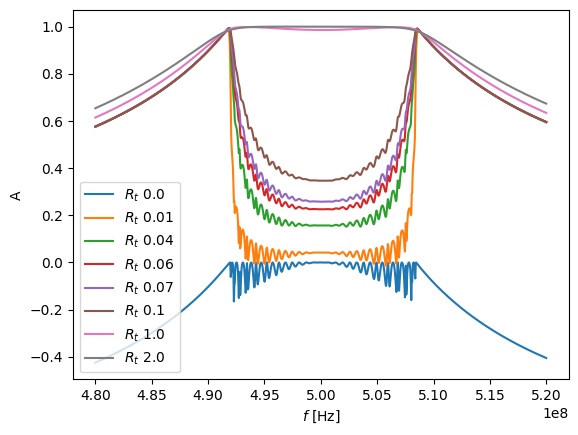

In [259]:
for i in range(Rt_scan.shape[0]):
    label = r'$R_t$ ' + str(Rt_scan[i])
    plt.plot(f_array, np.real(A_array[i, :]), label=label)

plt.xlabel(r'$f$ [Hz]')
plt.ylabel(r'A')
plt.legend()
np.where(np.real(A_array[1, :]) < 0)

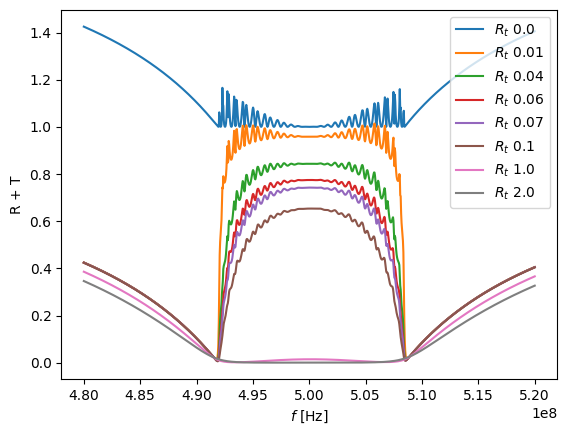

In [258]:
for i in range(Rt_scan.shape[0]):
    label = r'$R_t$ ' + str(Rt_scan[i])
    plt.plot(f_array, np.real(T_array[i, :])+np.real(R_array[i, :]), label=label)

plt.xlabel(r'$f$ [Hz]')
plt.ylabel(r'R + T')
plt.legend()

In [ ]:
# make plot of interstrap phase as function of frequency and power versus strap number 

In [231]:
Zmat = get_Zmat(num_straps=7, w=w0, S=0, M=M, R0=w0*M)
print(Zmat)
V_vec = np.zeros((7,1))
V_vec[0] = 1 # Vin
I_vec = np.matmul(np.linalg.inv(Zmat), V_vec)
I_vec

[[ 0. +0.j   0. +4.7j  0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j ]
 [ 0. +4.7j  0. +0.j   0. +4.7j  0. +0.j   0. +0.j   0. +0.j   0. +0.j ]
 [ 0. +0.j   0. +4.7j  0. +0.j   0. +4.7j  0. +0.j   0. +0.j   0. +0.j ]
 [ 0. +0.j   0. +0.j   0. +4.7j  0. +0.j   0. +4.7j  0. +0.j   0. +0.j ]
 [ 0. +0.j   0. +0.j   0. +0.j   0. +4.7j  0. +0.j   0. +4.7j  0. +0.j ]
 [ 0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +4.7j  0. +0.j   0. +4.7j]
 [ 0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +4.7j -4.7+0.j ]]


array([[-0.21276596+0.j        ],
       [ 0.        -0.21276596j],
       [ 0.21276596+0.j        ],
       [ 0.        +0.21276596j],
       [-0.21276596+0.j        ],
       [ 0.        -0.21276596j],
       [ 0.21276596+0.j        ]])

In [4]:
#######
# My PetraM Model
######

mu0 = 4*np.pi*10**(-7)
epsi0 = 8.85418e-12
D = 0.016
d = 0.004
Z0 = (1/(2*np.pi))*np.sqrt(mu0/epsi0)*np.log(D/d)
print('Z0: ', Z0)

Z0:  83.12015550094593
